# Classifying Iris Species

Classifying Iris species is a popular machine learning project that involves building a model to classify different species of Iris flowers based on their petal and sepal measurements. The Iris dataset is commonly used for this task and is available in many machine learning libraries, including scikit-learn.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Importing Dataset from sklearn.datasets

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [5]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [6]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:4]))


First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]


# Splitting Dataset

Splitting a dataset refers to the process of dividing a given dataset into two or more subsets for training and evaluation purposes. The most common type of split is between the training set and the testing (or validation) set. This division allows us to assess the performance of a machine learning model on unseen data and evaluate its generalization capabilities.

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris_dataset["data"],
                                                    iris_dataset["target"],
                                                    random_state = 0)

In [8]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [9]:
iris_dataframe = pd.DataFrame(x_train, columns = iris_dataset.feature_names)

In [10]:
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


# Correlation Matrix

A correlation matrix is a table that shows the pairwise correlations between variables in a dataset. Each cell in the table represents the correlation between two variables, and the strength and direction of the correlation is indicated by the color and magnitude of the cell.

Correlation matrices are commonly used in data analysis to identify relationships between variables and to help understand the structure of the data. The values in the correlation matrix range from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

In [11]:
corr_data = iris_dataframe.corr()

In [12]:
corr_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.054811,0.886818,0.838818
sepal width (cm),-0.054811,1.000000,-0.356472,-0.300639
petal length (cm),0.886818,-0.356472,1.000000,0.967410
petal width (cm),0.838818,-0.300639,0.967410,1.000000


<AxesSubplot:>

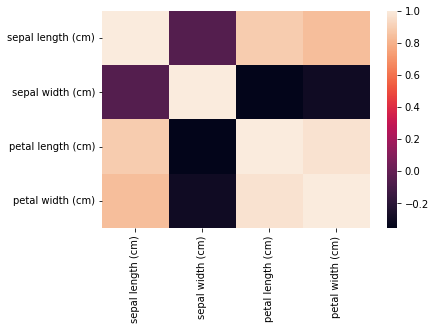

In [13]:
sns.heatmap(corr_data)

In [14]:
iris_dataframe.mean()

sepal length (cm)    5.886607
sepal width (cm)     3.051786
petal length (cm)    3.796429
petal width (cm)     1.223214
dtype: float64

# KNeighbors Classifier

The K-Nearest Neighbors (KNN) Classifier is a machine learning algorithm used for both classification and regression tasks. It is a non-parametric algorithm that makes predictions based on the similarity of a new data point to its neighboring data points in the training dataset.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier()

In [17]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn.predict(x_test)

In [19]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [21]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [22]:
accuracy_score_knn = accuracy_score(y_pred, y_test)

In [23]:
accuracy_score_knn

0.9736842105263158

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



<AxesSubplot:>

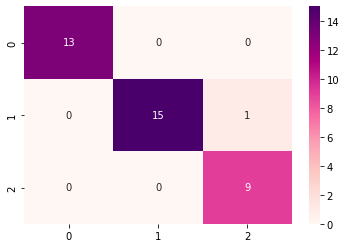

In [25]:
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot = True, 
            cmap = 'RdPu')

# Random Forest Classifier

The Random Forest classifier is an ensemble learning method that combines multiple decision trees to make predictions. It operates by constructing a multitude of decision trees during training and outputs the class that is the mode of the classes predicted by the individual trees.

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
random_forest = RandomForestClassifier()

In [28]:
random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [29]:
random_forest.score(x_train, y_train)

1.0

In [30]:
y_pred_random_forest = random_forest.predict(x_test)

In [31]:
y_pred_random_forest

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [33]:
accuracy_score_clf = accuracy_score(y_pred_random_forest, y_test)

In [34]:
accuracy_score_clf

0.9736842105263158

In [35]:
print(classification_report(y_pred_random_forest, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        15
           2       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



<AxesSubplot:>

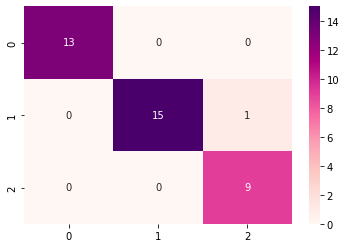

In [36]:
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot = True, 
            cmap = 'RdPu')

In [37]:
random_forest.score(x_train, y_train)

1.0

# Cross Validation Score

The cross-validation score is a metric used to evaluate the performance of a model by estimating its accuracy on unseen data. It is obtained by dividing the data into multiple subsets or "folds" and iteratively training and evaluating the model on different combinations of training and testing data.

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

In [39]:
leave_one = LeaveOneOut()

In [40]:
kfold = KFold()

In [41]:
cross_val_acc_kfold = cross_val_score(random_forest, x_train, y_train , cv = kfold)

In [42]:
cross_val_acc_kfold

array([0.86956522, 1.        , 1.        , 0.95454545, 0.90909091])

In [43]:
np.mean(cross_val_acc_kfold)

0.9466403162055336

In [44]:
cross_val_accuracy = cross_val_score(knn, x_train, y_train, cv = 9, scoring = "accuracy")

In [45]:
cross_val_accuracy

array([1.        , 0.92307692, 1.        , 0.92307692, 1.        ,
       1.        , 0.83333333, 0.91666667, 1.        ])

In [46]:
np.mean(cross_val_accuracy)

0.9551282051282052

In [47]:
cross_val_acc_leave_one = cross_val_score(knn, x_train, y_train, cv = leave_one)

In [48]:
cross_val_acc_leave_one

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [50]:
print(confusion_matrix(y_pred, y_test))

[[13  0  0]
 [ 0 15  0]
 [ 0  1  9]]


# Confusion Matrix Display

The confusion matrix is a table that is used to evaluate the performance of a classification model. It provides a summary of the model's predictions by showing the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) for each class.

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

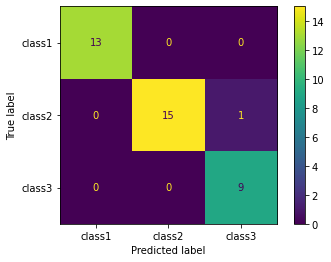

In [52]:
class_labels = ['class1', 'class2', 'class3'] 
confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_labels)
disp.plot()